In [118]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

In [119]:
with open('barycenter/COCO_train', 'rb') as f:
    coco = pickle.load(f)

In [120]:
dataset_list = sorted(dataset for dataset in os.listdir('barycenter')) # if dataset.split('_')[-1] == 'mean.pkl')
n = len(dataset_list)
distances = {}

In [124]:
for i, dataset in enumerate(dataset_list):
    with open(os.path.join('barycenter', dataset), 'rb') as f:
        mean = pickle.load(f)
        distances[dataset] = F.pairwise_distance(mean.unsqueeze(dim=0), coco.unsqueeze(dim=0)).item()

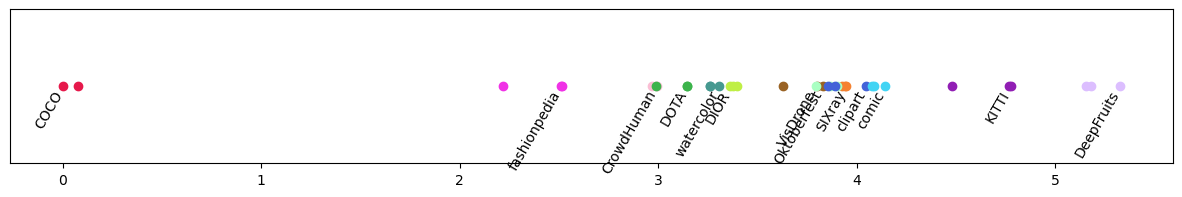

In [156]:
plt.figure(figsize=(15, 2))

for dataset, distance in distances.items():
    plt.scatter(distance, 0, color=colors_dict[dataset.split('_')[0]])
    if dataset.split('_')[1] == 'train':
        plt.text(distance, -0.005, dataset.split('_')[0], rotation=60, ha="right", rotation_mode="anchor")

plt.yticks([])
plt.show()

In [ ]:
dataset_list = sorted(dataset for dataset in os.listdir('barycenter')) # if dataset.split('_')[-1] == 'mean.pkl')
n = len(dataset_list)
distances = np.zeros((n, n))

In [77]:
for i, dataset1 in enumerate(dataset_list):
    with open(os.path.join('barycenter', dataset1), 'rb') as f:
        mean1 = pickle.load(f)
    for j, dataset2 in enumerate(dataset_list):
        with open(os.path.join('barycenter', dataset2), 'rb') as f:
            mean2 = pickle.load(f)
        distances[i, j] = F.pairwise_distance(mean1.unsqueeze(dim=0), mean2.unsqueeze(dim=0))

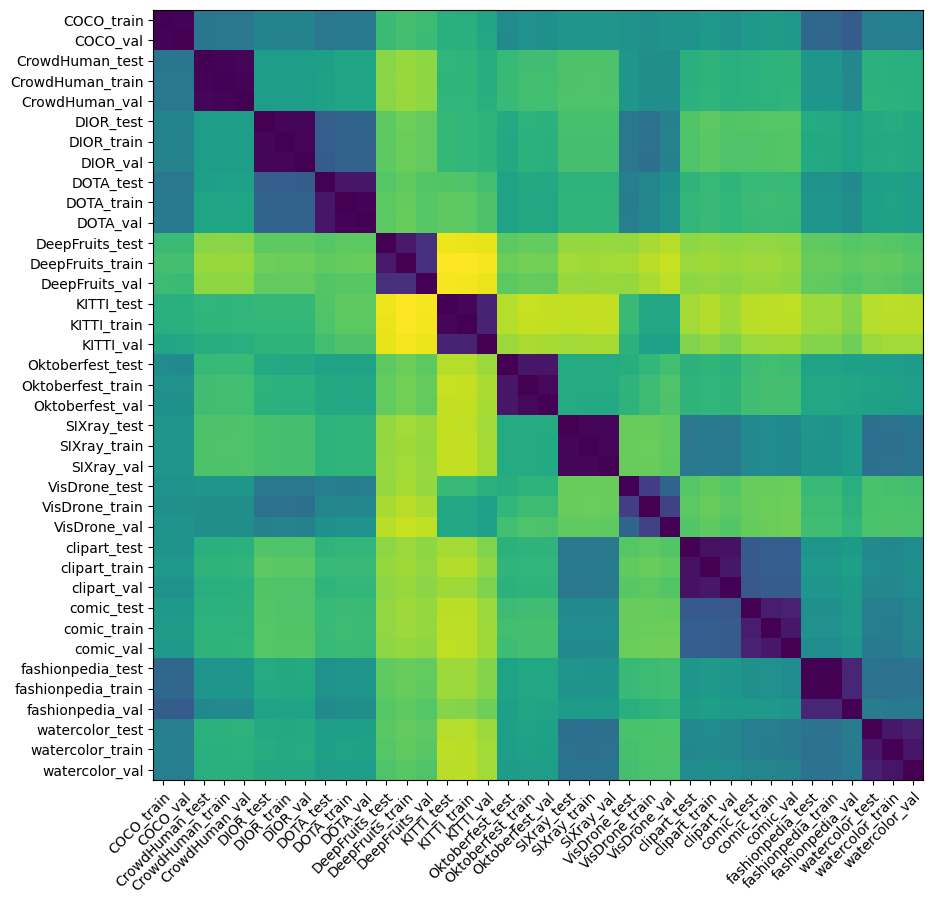

In [78]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
im = ax.imshow(distances)

ax.set_xticks(np.arange(n), labels=dataset_list)
ax.set_yticks(np.arange(n), labels=dataset_list)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.show()

In [79]:
import matplotlib.pyplot as plt
import random

number_of_colors = 13

color = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
         for i in range(number_of_colors)]

dataset_names = ['COCO', 'CrowdHuman', 'DIOR', 'DOTA', 'DeepFruits', 'KITTI', 'Oktoberfest', 'SIXray', 'VisDrone',
                 'clipart', 'comic', 'fashionpedia', 'watercolor']

colors_dict = {}
for c, dn in zip(color, dataset_names):
    colors_dict[dn] = c

print(colors_dict)

{'COCO': '#BC89BC', 'CrowdHuman': '#E7E02C', 'DIOR': '#731E9F', 'DOTA': '#A01E61', 'DeepFruits': '#7CF6F8', 'KITTI': '#B8D9FE', 'Oktoberfest': '#FD9C04', 'SIXray': '#0DC95D', 'VisDrone': '#FCC890', 'clipart': '#72D909', 'comic': '#255A1F', 'fashionpedia': '#7D43B0', 'watercolor': '#D8619D'}


In [ ]:
colors_dict = {'COCO': '#9D6FD7',
               'CrowdHuman': '#E6C8C7',
               'DIOR': '#003A37',
               'DOTA': '#8AFF66',
               'DeepFruits': '#284D26',
               'KITTI': '#F65794',
               'Oktoberfest': '#804E96',
               'SIXray': '#C05E5A',
               'VisDrone': '#458BBC',
               'clipart': '#C83F0F',
               'comic': '#3C7503',
               'fashionpedia': '#3B9F21',
               'watercolor': '#E68C70'}

In [81]:
dataset_features = []
for dataset in dataset_list:
    with open(os.path.join('barycenter', dataset), 'rb') as f:
        mean = pickle.load(f)
    dataset_features.append(mean.cpu().numpy())

In [82]:
dataset_features = np.array(dataset_features)
dataset_features.shape

(38, 1024)

In [83]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_features = pca.fit_transform(dataset_features)
pca_features.shape

(38, 3)

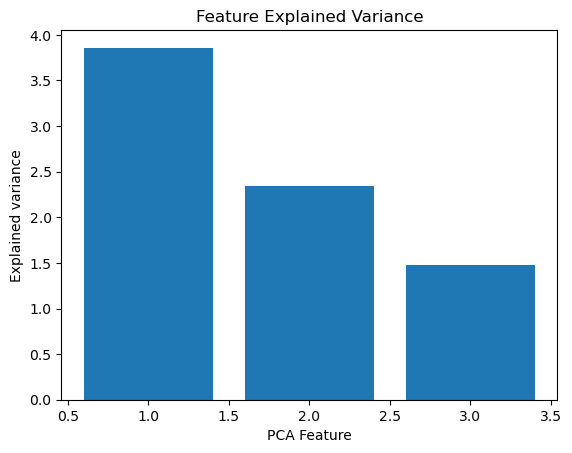

In [84]:
plt.bar(
    range(1, len(pca.explained_variance_) + 1),
    pca.explained_variance_
)

plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

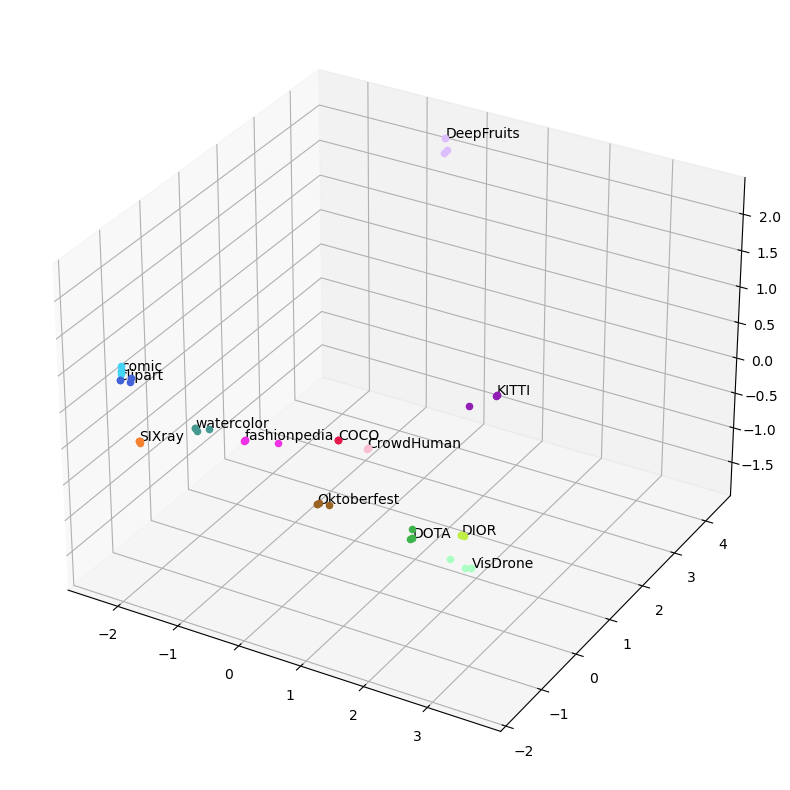

In [85]:
%matplotlib inline

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(10, 10)

for i, dataset in enumerate(dataset_list):

    ax.scatter(pca_features[i, 0], pca_features[i, 1], pca_features[i, 2], color=colors_dict[dataset.split('_')[0]])
    if dataset.split('_')[1] == 'train':
        ax.scatter(pca_features[i, 0], pca_features[i, 1], pca_features[i, 2], color=colors_dict[dataset.split('_')[0]])
        ax.text(pca_features[i, 0], pca_features[i, 1], pca_features[i, 2], dataset.split('_')[0])

plt.show()

In [86]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(dataset_features)
pca_features.shape

(38, 2)

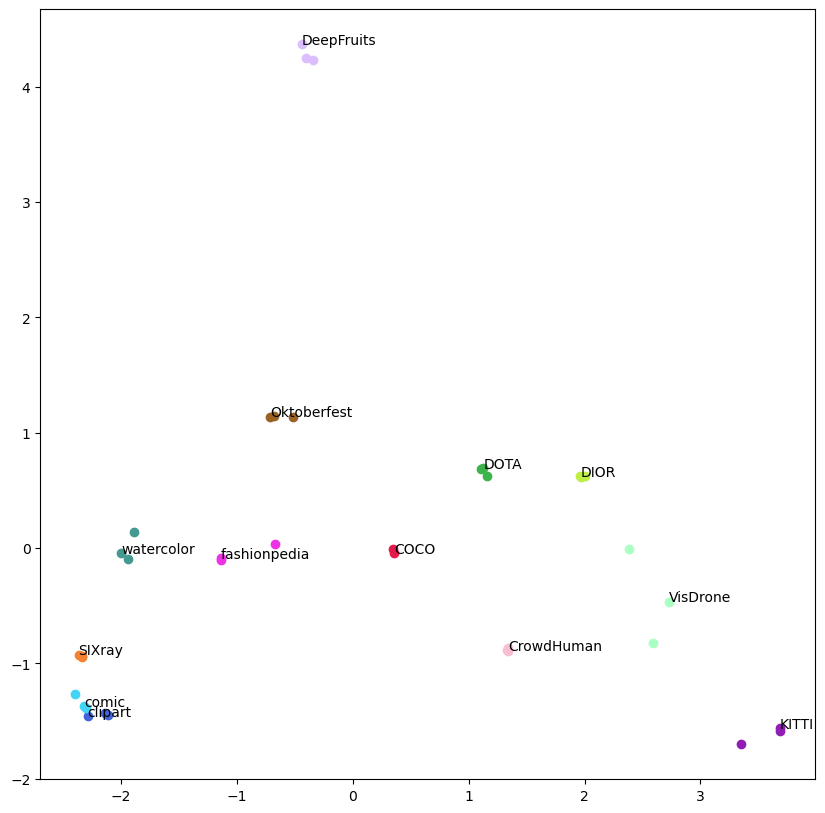

In [88]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

for i, dataset in enumerate(dataset_list):

    if dataset[-1] == 'l':
        ax.scatter(pca_features[i, 0], pca_features[i, 1], color=colors_dict[dataset[:-4]])
    elif dataset[-1] == 't':
        ax.scatter(pca_features[i, 0], pca_features[i, 1], color=colors_dict[dataset[:-5]])
    else:
        ax.scatter(pca_features[i, 0], pca_features[i, 1], color=colors_dict[dataset[:-6]])
        ax.text(pca_features[i, 0], pca_features[i, 1], dataset[:-6])

plt.show()

In [90]:
dataset_list = sorted(os.listdir('class_barycenter'))
distances = {}

In [91]:
for dataset in dataset_list:
    classes = [x for x in sorted(os.listdir(os.path.join('class_barycenter', dataset)),
                                 key=lambda item: (int(item.partition('_')[0])
                                                   if item[0].isdigit() else float('inf'), item))
               if x[-5] == 'n']
    distances[dataset] = np.zeros((len(classes), len(classes)))
    for i, class1 in enumerate(classes):
        with open(os.path.join('class_barycenter', dataset, class1), 'rb') as f:
            mean1 = pickle.load(f)
        for j, class2 in enumerate(classes):
            with open(os.path.join('class_barycenter', dataset, class2), 'rb') as f:
                mean2 = pickle.load(f)
            distances[dataset][i, j] = F.pairwise_distance(mean1.unsqueeze(dim=0), mean2.unsqueeze(dim=0))

In [17]:
dataset_list

['COCO_train',
 'COCO_val',
 'CrowdHuman_test',
 'CrowdHuman_train',
 'CrowdHuman_val',
 'DIOR_test',
 'DIOR_train',
 'DIOR_val',
 'DOTA_test',
 'DOTA_train',
 'DOTA_val',
 'DeepFruits_test',
 'DeepFruits_train',
 'DeepFruits_val',
 'KITTI_test',
 'KITTI_train',
 'KITTI_val',
 'Oktoberfest_test',
 'Oktoberfest_train',
 'Oktoberfest_val',
 'SIXray_test',
 'SIXray_train',
 'SIXray_val',
 'VisDrone_test',
 'VisDrone_train',
 'VisDrone_val',
 'clipart_test',
 'clipart_train',
 'clipart_val',
 'comic_test',
 'comic_train',
 'comic_val',
 'fashionpedia_test',
 'fashionpedia_train',
 'fashionpedia_val',
 'watercolor_test',
 'watercolor_train',
 'watercolor_val']

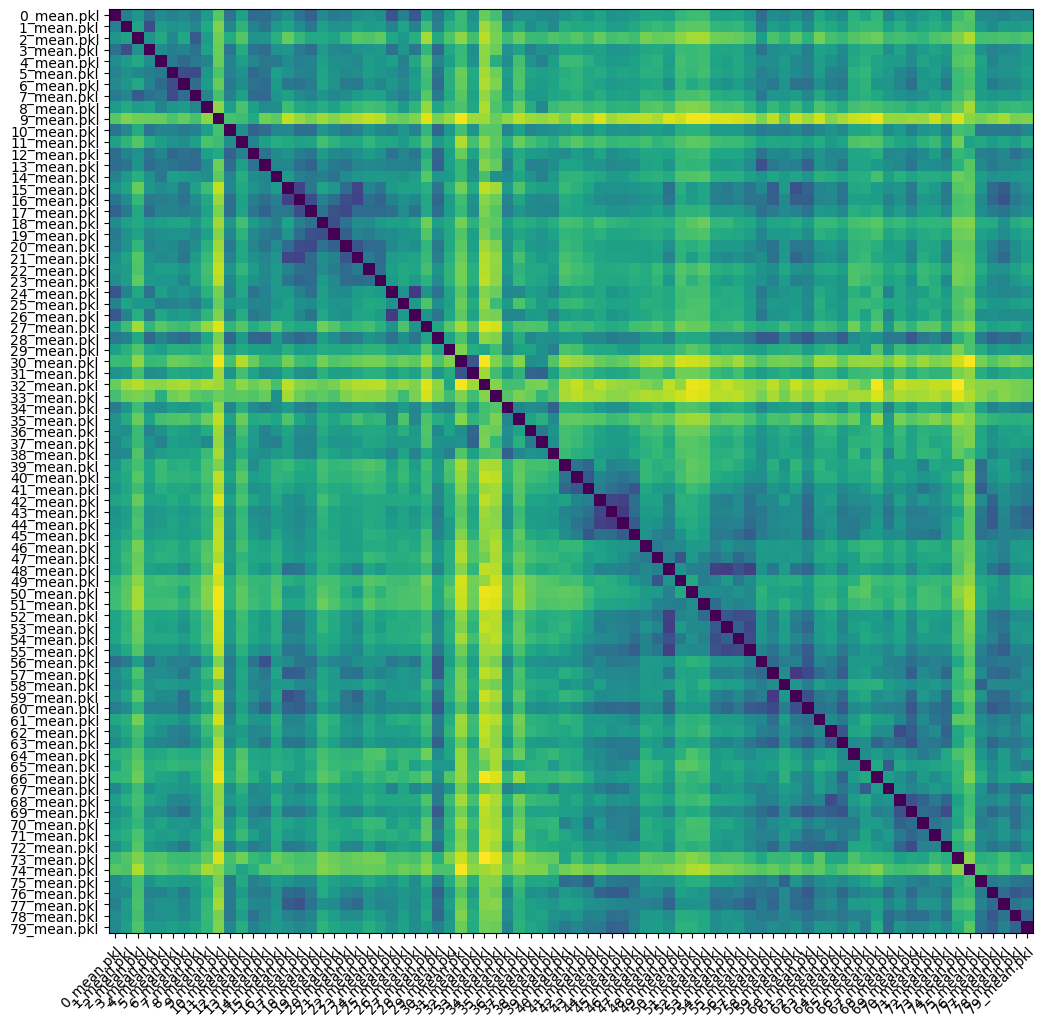

In [92]:
dataset = 'COCO_train'
classes = [x for x in sorted(os.listdir(os.path.join('class_barycenter', dataset)),
                             key=lambda item: (int(item.partition('_')[0])
                                               if item[0].isdigit() else float('inf'), item))
           if x[-5] == 'n']
n = len(classes)

fig, ax = plt.subplots()
fig.set_size_inches(12, 12)
im = ax.imshow(distances[dataset])

ax.set_xticks(np.arange(n), labels=classes)
ax.set_yticks(np.arange(n), labels=classes)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.show()

In [93]:
features = []
names = []
# for dataset in dataset_list:
for dataset in ['COCO_train']:
    classes = [x for x in sorted(os.listdir(os.path.join('class_barycenter', dataset)),
                                 key=lambda item: (int(item.partition('_')[0])
                                                   if item[0].isdigit() else float('inf'), item))
               if x[-5] == 'n']
    for class_id in classes:
        with open(os.path.join('class_barycenter', dataset, class_id), 'rb') as f:
            mean = pickle.load(f)
        features.append(mean.cpu().numpy())
        names.append(dataset + class_id)

In [94]:
features = np.array(features)
features.shape

(80, 1024)

In [95]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_features = pca.fit_transform(features)
pca_features.shape

(80, 3)

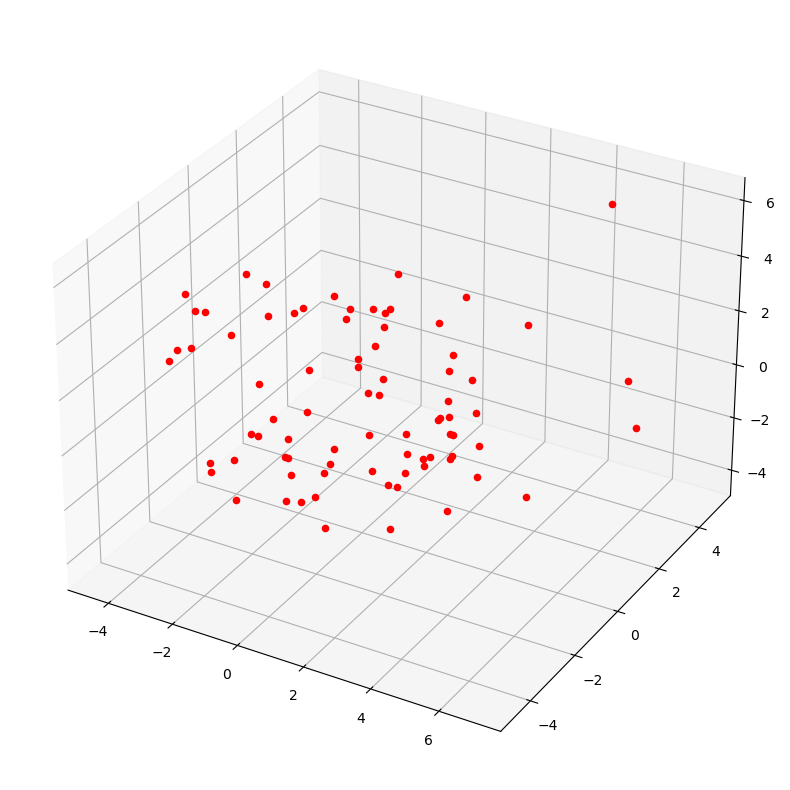

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(10, 10)

for i, class_id in enumerate(classes):
    ax.scatter(pca_features[i, 0], pca_features[i, 1], pca_features[i, 2], color='r')

plt.show()

In [45]:
import matplotlib.pyplot as plt
import random

number_of_colors = 13

color = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
         for i in range(number_of_colors)]

dataset_names = ['COCO', 'CrowdHuman', 'DIOR', 'DOTA', 'DeepFruits', 'KITTI', 'Oktoberfest', 'SIXray', 'VisDrone',
                 'clipart', 'comic', 'fashionpedia', 'watercolor']

colors_dict = {}
for c, dn in zip(color, dataset_names):
    colors_dict[dn] = c

print(colors_dict)

{'COCO': '#27B476', 'CrowdHuman': '#EA9F10', 'DIOR': '#D4B317', 'DOTA': '#1B7806', 'DeepFruits': '#7A737D', 'KITTI': '#96BC4B', 'Oktoberfest': '#7BE727', 'SIXray': '#AF6B98', 'VisDrone': '#6075E8', 'clipart': '#A0247E', 'comic': '#D26B40', 'fashionpedia': '#302344', 'watercolor': '#3392C4'}


In [97]:
features = []
names = []
for dataset in dataset_list:
    classes = [x for x in sorted(os.listdir(os.path.join('class_barycenter', dataset)),
                                 key=lambda item: (int(item.partition('_')[0])
                                                   if item[0].isdigit() else float('inf'), item))
               if x[-5] == 'n']
    for class_id in classes:
        with open(os.path.join('class_barycenter', dataset, class_id), 'rb') as f:
            mean = pickle.load(f)
        features.append(mean.cpu().numpy())
        names.append(dataset + class_id)

In [98]:
names = [name.split('_')[0] for name in names]

In [99]:
features = np.array(features)
features.shape

(625, 1024)

In [100]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_features = pca.fit_transform(features)
pca_features.shape

(625, 3)

In [80]:
colors_dict = {'COCO': '#e6194B',
               'CrowdHuman': '#fabed4',
               'DIOR': '#bfef45',
               'DOTA': '#3cb44b',
               'DeepFruits': '#dcbeff',
               'KITTI': '#911eb4',
               'Oktoberfest': '#9a6324',
               'SIXray': '#f58231',
               'VisDrone': '#aaffc3',
               'clipart': '#4363d8',
               'comic': '#42d4f4',
               'fashionpedia': '#f032e6',
               'watercolor': '#469990'}

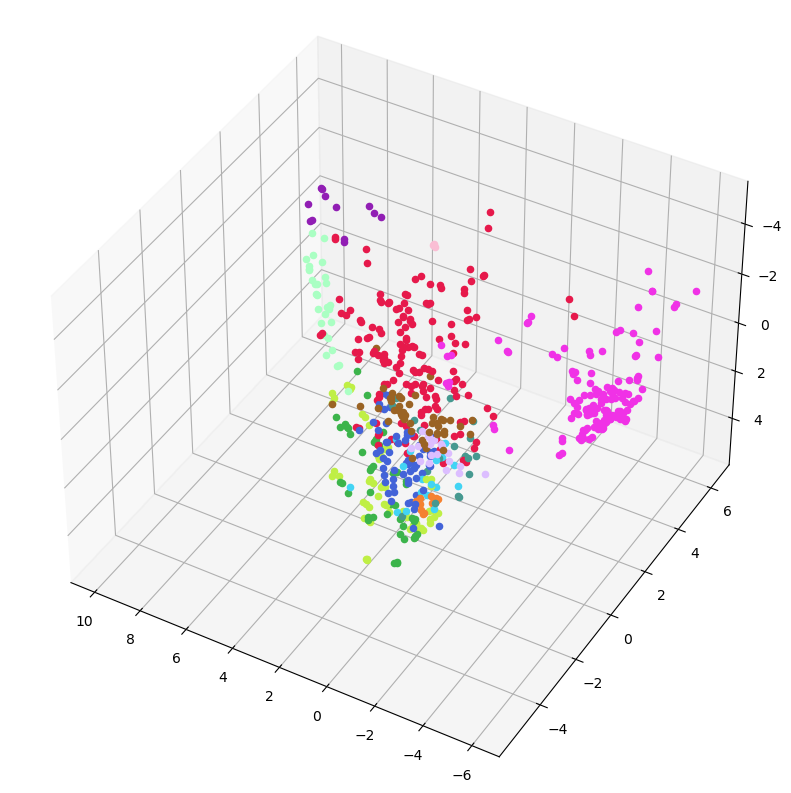

In [117]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(-140, 60)
fig.set_size_inches(10, 10)

visited = []

for i in range(pca_features.shape[0]):
    ax.scatter(pca_features[i, 0], pca_features[i, 1], pca_features[i, 2], color=colors_dict[names[i].split('_')[0]], label=names[i].split('_')[0])

handles, labels = ax.get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)

# ax.legend(handle_list, label_list)
plt.show()

In [106]:
features = []
names = []
for dataset in dataset_list:
    classes = [x for x in sorted(os.listdir(os.path.join('class_barycenter', dataset)),
                                 key=lambda item: (int(item.partition('_')[0])
                                                   if item[0].isdigit() else float('inf'), item))
               if x[-5] == 'n']
    for class_id in classes:
        with open(os.path.join('class_barycenter', dataset, class_id), 'rb') as f:
            mean = pickle.load(f)
        features.append(mean.cpu().numpy())
        names.append(dataset + class_id)

In [107]:
names = [name.split('_')[0] for name in names]

In [108]:
features = np.array(features)
features.shape

(625, 1024)

In [109]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_features = pca.fit_transform(features)
pca_features.shape

(625, 3)

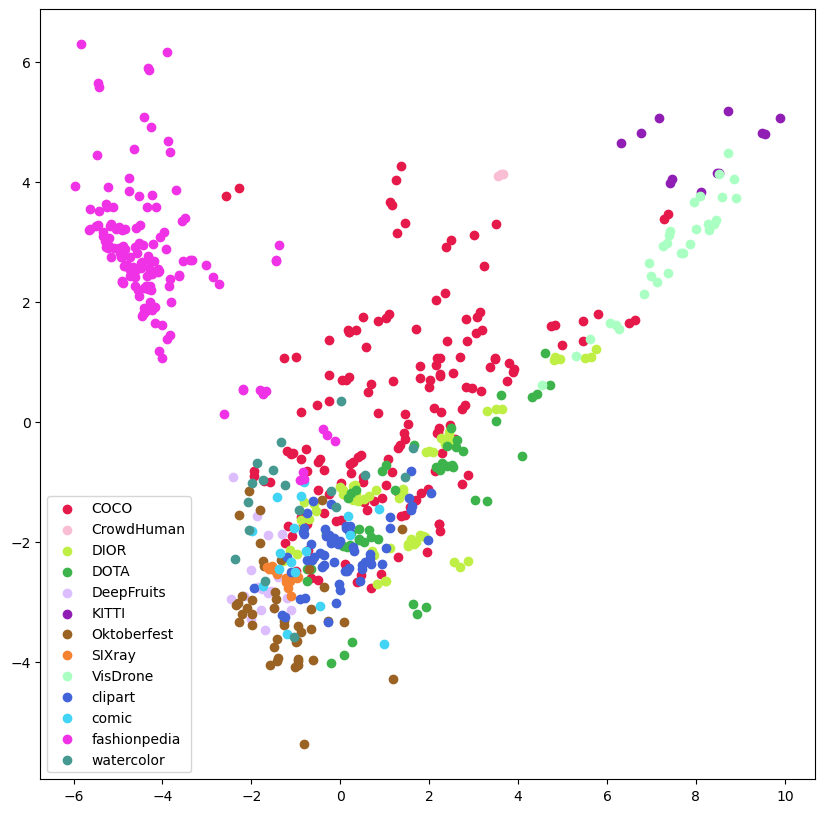

In [110]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

visited = []

for i in range(pca_features.shape[0]):
    ax.scatter(pca_features[i, 0], pca_features[i, 1], color=colors_dict[names[i]], label=names[i])

handles, labels = ax.get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)

ax.legend(handle_list, label_list)
plt.show()